In [1]:
!pip install psaw


In [28]:
import pandas as pd
import seaborn as sns
pd.set_option('max_colwidth', 500)
pd.set_option('max_columns', 50)

In [4]:
from psaw import PushshiftAPI

api = PushshiftAPI()

In [6]:
api_request_generator = api.search_submissions(subreddit= 'GradSchool', score = '>100')

df = pd.DataFrame([submission.d_ for submission in api_request_generator])

C:\Users\oli4v\anaconda3\lib\site-packages\psaw\PushshiftAPI.py:252: UserWarning: Not all PushShift shards are active. Query results may be incomplete
  warnings.warn(shards_down_message)


In [7]:
df.shape

(1112, 95)

In [9]:
df[['title', 'score']].sample(10)

,title,score
967,[Update] My PI passed away suddenly yesterday evening. No idea what happens now.,173
794,How I feel while waiting for feedback on my dissertation,257
394,Is it normal to not hate your advisor?,230
411,I'm a week into my PhD and I want to leave,151
994,"Welcome to grad school, where we'll tell you not to worry about your grades.......",102
524,"My friend's wife found a spoof of ""Goodnight Moon"" entitled ""Goodnight Lab."" This page is particularly accurate.",388
192,"P.h.Done! (original, I know)",254
773,Trying to work today but James Comey's testimony is so much more interesting!,147
896,PSA: Conferences are not holidays,120
170,How’s your Teaching Fellowship going?,126


In [11]:
df['date'] = pd.to_datetime(df['created_utc'], utc=True, unit = 's')

In [23]:
df.columns

Index(['all_awardings', 'allow_live_comments', 'author',
       'author_flair_css_class', 'author_flair_richtext', 'author_flair_text',
       'author_flair_type', 'author_fullname', 'author_is_blocked',
       'author_patreon_flair', 'author_premium', 'awarders', 'can_mod_post',
       'contest_mode', 'created_utc', 'domain', 'full_link', 'gildings', 'id',
       'is_created_from_ads_ui', 'is_crosspostable', 'is_meta',
       'is_original_content', 'is_reddit_media_domain', 'is_robot_indexable',
       'is_self', 'is_video', 'link_flair_background_color',
       'link_flair_richtext', 'link_flair_text_color', 'link_flair_type',
       'locked', 'media_only', 'no_follow', 'num_comments', 'num_crossposts',
       'over_18', 'parent_whitelist_status', 'permalink', 'pinned', 'pwls',
       'removed_by_category', 'retrieved_on', 'score', 'selftext',
       'send_replies', 'spoiler', 'stickied', 'subreddit', 'subreddit_id',
       'subreddit_subscribers', 'subreddit_type', 'thumbnail', 'tit

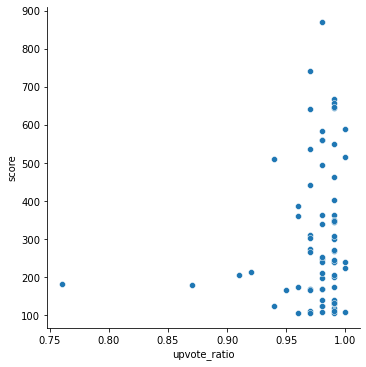

In [30]:
sns.relplot(x='upvote_ratio', y='score', data=df)

The upvote ratio on reddit is an indicator of how controversial a post is. The higher the ratio, the less controversial it is. In this visualisation, we can see that, for posts with at least 100 score, the upvote ratio is very high (almost exlusively above 0.95), indicating that the overwhelming majority of these posts are not controversial. 

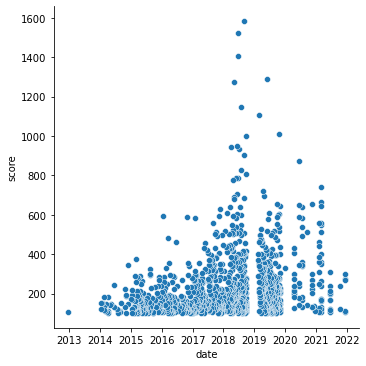

In [31]:
sns.relplot(x='date', y='score', data=df)

This visualisation shows that there was a spike in highly scored posts toward the end of 2018. Moreover, there are no data right at the turn to 2019. and early 2020. This could mean that no post reached over 100 score in that period but I find that unlikely considering there have been >100 score posts in every other period. Perhaps the subreddit turned private during these periods. A different explanation is that this data scraping tool did not manage to collect data from these periods, for some reason.